In [ ]:
!pip install mxnet
!pip install gluoncv

     |████████████████████████████████| 1.1MB 8.7MB/s 
     |████████████████████████████████| 122kB 41.5MB/s 
     |████████████████████████████████| 337kB 52.0MB/s 
     |████████████████████████████████| 14.1MB 226kB/s 
     |████████████████████████████████| 952kB 27.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 133kB 41.1MB/s 
     |████████████████████████████████| 716kB 37.6MB/s 
     |████████████████████████████████| 215kB 56.4MB/s 
     |████████████████████████████████| 22.3MB 46.7MB/s 
     |████████████████████████████████| 7.6MB 34.1MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
     |████████████████████████████████| 3.2MB 43.2MB/s 
     |████████████████████████████████| 71kB 10.6MB/s 
     |████████████████████████████████| 962kB 38.6MB/s 
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.18-cp37-cp37m-linux_x86_64.whl siz

In [ ]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt


In [ ]:
image=mx.image.imread('cat.png')

In [ ]:
print(image.shape)

(733, 490, 3)


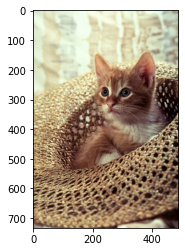

In [ ]:
plt.imshow(image.asnumpy())

In [ ]:
#needs 4 dim but the image has only 3, this is because the extra dimension comes from the batch of images that are passed to increase throughput
#also needs 32 float not unsigned 8 integer
image=gcv.data.transforms.presets.imagenet.transform_eval(image)

In [ ]:
print(image.shape)

(1, 3, 224, 224)


In [ ]:
network=gcv.model_zoo.get_model('ResNet50_v1d',pretrained=True)

55464KB [00:00, 58883.52KB/s]                           


In [ ]:
prediction=network(image)

In [ ]:
print(prediction.shape)

(1, 1000)


In [ ]:
prediction=prediction[0]

In [ ]:
print(prediction.shape)

(1000,)


In [ ]:
probability=mx.nd.softmax(prediction)
print(probability)


[1.28409694e-04 3.29291768e-04 1.12903392e-04 2.55731953e-04
 2.59238412e-04 1.62671285e-03 8.41121771e-04 1.77047536e-04
 4.77810041e-04 1.84824909e-04 8.99285733e-05 1.38324918e-04
 3.15072946e-04 2.01535950e-04 1.61314514e-04 3.96534946e-04
 2.84391979e-04 1.79741663e-04 1.26686820e-04 1.48641499e-04
 2.06481374e-04 2.82513385e-04 1.54881694e-04 1.82496718e-04
 3.63342551e-04 1.09244269e-04 1.27356048e-04 4.85190074e-04
 1.79446302e-04 2.19912443e-04 1.68179846e-04 4.99075570e-04
 3.32659198e-04 2.00050461e-04 4.22283018e-04 1.93405504e-04
 2.34012987e-04 2.08682832e-04 6.54494972e-04 2.36956112e-04
 5.82121836e-04 7.89829239e-04 8.41687084e-04 6.04749483e-04
 6.50425616e-04 1.63361081e-03 3.64941749e-04 4.31027613e-04
 5.40723791e-04 2.98296742e-04 3.39974562e-04 2.80295848e-04
 2.86849478e-04 1.74308982e-04 9.12634248e-04 2.33734740e-04
 1.00470264e-03 8.05691059e-04 4.50659485e-04 1.71514635e-04
 4.50972497e-04 3.09710711e-04 4.52221022e-04 1.40868104e-03
 1.56682596e-04 1.70063

In [ ]:
rounded_prob=mx.nd.round(prediction*100)/100
print(rounded_prob)


[-0.23  0.71 -0.36  0.45  0.47  2.3   1.65  0.09  1.08  0.13 -0.59 -0.16
  0.66  0.22 -0.01  0.89  0.56  0.1  -0.25 -0.09  0.24  0.55 -0.05  0.12
  0.81 -0.4  -0.24  1.09  0.1   0.3   0.04  1.12  0.72  0.21  0.96  0.18
  0.37  0.25  1.39  0.38  1.28  1.58  1.65  1.32  1.39  2.31  0.81  0.98
  1.2   0.61  0.74  0.55  0.57  0.07  1.73  0.36  1.82  1.6   1.02  0.05
  1.02  0.65  1.02  2.16 -0.04  0.05  2.64  1.3   0.93  0.15  0.12  0.6
 -0.55 -0.1  -0.34  0.28 -0.09 -0.73  0.64  0.57  0.4   0.12  2.6   2.36
 -0.04  1.95  2.23  0.67  0.2  -0.67  0.37  0.61 -0.73  0.22  0.29 -0.34
 -0.53  0.45  0.56 -0.79 -0.61  0.03  0.54  0.12 -0.86 -0.69  0.33  0.
  0.68  0.04  0.41  0.86  1.61  1.97  0.81 -0.06 -0.16  1.22 -0.21 -0.37
  0.45  0.43  0.48  0.42 -0.28  0.24 -0.69 -0.33 -0.27  0.03 -0.05 -0.42
 -0.51  0.67 -0.76  1.63 -0.82 -0.37  1.04  0.42  0.64  1.12  0.66  0.3
  0.77  0.02 -0.23 -0.12  0.48  0.34 -0.08  1.96  0.45  0.12  1.47  1.14
  1.09  1.42  1.68  0.63 -0.09  0.1  -0.73 -0.43  0.06

In [ ]:
k=5
topk_indices=mx.nd.topk(probability,k=k)
topk_indices


[285. 281. 282. 283. 287.]
<NDArray 5 @cpu(0)>

In [ ]:
network.classes[285]

'Egyptian cat'

In [ ]:
for i in range(k):
  class_index=topk_indices[i].astype('int').asscalar()
  class_label=network.classes[class_index]
  class_probability=probability[class_index]
  print(str(class_label)+" "+str(class_probability))

Egyptian cat 
[0.22624512]
<NDArray 1 @cpu(0)>
tabby 
[0.21363121]
<NDArray 1 @cpu(0)>
tiger cat 
[0.09006338]
<NDArray 1 @cpu(0)>
Persian cat 
[0.06209728]
<NDArray 1 @cpu(0)>
lynx 
[0.01284372]
<NDArray 1 @cpu(0)>
